In [127]:
import pandas as pd
import datetime
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [128]:
cd gdrive/My\ Drive/음원순위_parameter tuning

[Errno 2] No such file or directory: 'gdrive/My Drive/음원순위_parameter tuning'
/content/gdrive/My Drive/음원순위_parameter tuning


In [212]:
df = pd.read_csv('final_data_3.csv')

In [214]:
list_rank = []
for i in df['previous_ranking']:
    list_rank.append(str(i).replace('.0',''))

In [215]:
df['previous_ranking'] = list_rank

In [192]:
df = pd.get_dummies(df, columns = ['you_rank_g','genre','season','sex','song_type','active_type','previous_ranking'])

In [193]:
# 2020.4.19를 테스트로 한다. 
test = df.loc[df['st_day'] == '2020.4.19']
train = df.loc[df['st_day'] != '2020.4.19']

In [194]:
train

,artist,name,rank_g,title_song,week,runtime,top_freq,gg_score,nv_score,total_view,season_genre_score,pd_score,dc_total_numb,dc_mean_reccomend,dc_mean_views,drama_view,st_day,rank,you_rank_g_1,you_rank_g_2,you_rank_g_3,you_rank_g_4,you_rank_g_5,you_rank_g_6,you_rank_g_7,you_rank_g_8,you_rank_g_9,you_rank_g_10,genre_All,genre_Ani/Game,genre_Ballad,genre_Blues/Folk,genre_Dance,genre_Drama,genre_Electronica,genre_Foreign Movie,genre_Indi,genre_Jazz,genre_Pop,genre_R&B/Soul,...,genre_Rock,genre_Trot,genre_carol,season_fall,season_spring,season_summer,season_winter,sex_female,sex_male,sex_mixed,song_type_K_POP,song_type_OST,song_type_Others,song_type_POP,active_type_Band,active_type_Duet,active_type_Group,active_type_Project,active_type_Solo,previous_ranking_1.0,previous_ranking_10.0,previous_ranking_20.0,previous_ranking_30.0,previous_ranking_40.0,previous_ranking_50.0,previous_ranking_60.0,previous_ranking_70.0,previous_ranking_80.0,previous_ranking_90.0,previous_ranking_100.0,previous_ranking_110.0,previous_ranking_120.0,previous_ranking_130.0,previous_ranking_140.0,previous_ranking_150.0,previous_ranking_160.0,previous_ranking_170.0,previous_ranking_180.0,previous_ranking_190.0,previous_ranking_200.0
0,10cm,폰서트,90,1,2018-05-13,0.508876,0.240385,0.32,0.485515,0.793178,0.513550,0.774053,0.0,0.0,0.0,0.0,2018.5.13,98,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,BLACKPINK,마지막처럼,80,1,2018-05-13,0.553254,0.317308,0.07,0.511548,0.847350,0.551930,0.680336,0.0,0.0,0.0,0.0,2018.5.13,80,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Camila Cabello,Havana,20,1,2018-05-13,0.565089,0.855769,0.33,0.871046,0.812555,0.529333,0.000000,0.0,0.0,0.0,0.0,2018.5.13,26,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Carla Bruni,Stand By Your Man,80,1,2018-05-13,0.408284,0.038462,0.41,0.857812,0.000000,0.529333,0.819462,0.0,0.0,0.0,0.0,2018.5.13,86,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,DEAN,instagram,50,1,2018-05-13,0.680473,0.250000,0.48,0.804124,0.787867,0.566807,0.000000,0.0,0.0,0.0,0.0,2018.5.13,53,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16858,수호,너의 차례,140,0,2020-04-12,0.585799,0.028846,0.58,0.501078,0.000000,0.660567,0.739838,0.0,0.0,0.0,0.0,2020.4.12,143,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
16859,수호,암막 커튼,190,0,2020-04-12,0.745562,0.019231,0.58,0.501078,0.000000,0.509299,0.739838,0.0,0.0,0.0,0.0,2020.4.12,199,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
16860,수호,자화상,170,0,2020-04-12,0.603550,0.028846,0.58,0.501078,0.000000,0.509299,0.739838,0.0,0.0,0.0,0.0,2020.4.12,175,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
16861,창모,빌었어,70,0,2020-04-12,0.576923,0.192308,0.38,0.560714,0.818587,0.477572,0.485515,0.0,0.0,0.0,0.0,2020.4.12,71,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [195]:
# week 필요없음
train = train.drop(columns = ['week','artist','name','rank_g','st_day'])
test = test.drop(columns = ['week','artist','name','rank_g','st_day'])

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop(columns = ['rank']),train['rank'], test_size = 0.3)

# 사용 예정 모델
- XGboost
- LightGBM
- RandomForest
- Catboost
- Logistic regression

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error, SCORERS

# Logistic Regression

In [50]:
LR_model = LinearRegression()

In [105]:
stf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)

In [112]:
score =  cross_val_score(LR_model, X_train, y_train, cv = stf, scoring = 'neg_mean_squared_error')
score.mean()

-7.061872245451187e+20

In [51]:
LR_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [131]:
pred_y = LR_model.predict(X_test)

In [132]:
print("RMSE : %.3f" % math.sqrt(mean_squared_error(y_test, pred_y)))

RMSE : 21.215


In [54]:
pred_y = LR_model.predict(test.drop(columns = ['rank']))

In [55]:
print("F1 : %.3f" % math.sqrt(mean_squared_error(test['rank'], pred_y)))

F1 : 21.325


In [102]:
joblib.dump(LR_model,'LinearModel.pkl')

['LinearModel.pkl']

Feature: 0, Score: -3.54148
Feature: 1, Score: 4.19286
Feature: 2, Score: -18.28934
Feature: 3, Score: -7.77275
Feature: 4, Score: -7.62960
Feature: 5, Score: -6.11845
Feature: 6, Score: 7.96456
Feature: 7, Score: -1.68310
Feature: 8, Score: -14.35055
Feature: 9, Score: 37.67103
Feature: 10, Score: 20.56290
Feature: 11, Score: -2.92101
Feature: 12, Score: -12672004355755.43359
Feature: 13, Score: -12672004355750.14453
Feature: 14, Score: -12672004355749.05078
Feature: 15, Score: -12672004355748.24219
Feature: 16, Score: -12672004355749.03711
Feature: 17, Score: -12672004355748.14258
Feature: 18, Score: -12672004355748.64453
Feature: 19, Score: -12672004355747.69336
Feature: 20, Score: -12672004355748.34766
Feature: 21, Score: -12672004355747.53906
Feature: 22, Score: -14512877568037.25195
Feature: 23, Score: -14512877568029.64258
Feature: 24, Score: -14512877568040.35742
Feature: 25, Score: -14512877568035.54492
Feature: 26, Score: -14512877568036.56445
Feature: 27, Score: -14512877568

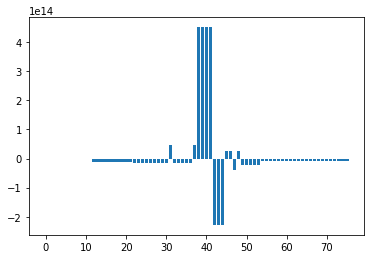

In [135]:
# linear regression feature importance
from matplotlib import pyplot
# get importance
importance = LR_model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# RandomForest

In [44]:
f_model = RandomForestRegressor(random_state =1, n_estimators = 500)

In [38]:
stf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)

In [182]:
score = cross_val_score(f_model, X_train, y_train, cv = stf, scoring = 'f1_micro')

In [183]:
score.mean()

0.6959748858245023

In [45]:
f_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [133]:
pred_y = f_model.predict(X_test)

In [134]:
print("MSE : %.3f" % math.sqrt(mean_squared_error(y_test, pred_y)))

MSE : 11.543


In [48]:
pred_y = f_model.predict(test.drop(columns = ['rank']))

In [49]:
print("MSE : %.3f" % math.sqrt(mean_squared_error(test['rank'], pred_y)))

MSE : 21.330


In [101]:
joblib.dump(f_model,'rf_model.pkl')

['rf_model.pkl']

In [137]:
from matplotlib import pyplot as plt

In [169]:
f_model.feature_importances_

array([2.73068341e-03, 1.15120733e-02, 4.03169208e-02, 1.39841619e-02,
       1.36876011e-02, 5.69159747e-03, 8.49801930e-03, 1.10128640e-02,
       1.73443420e-03, 1.78377324e-03, 2.36638944e-03, 1.01062233e-03,
       9.31186818e-04, 1.90417099e-04, 2.36574029e-04, 3.93221120e-04,
       2.18973284e-04, 4.89952462e-04, 8.58436501e-04, 8.74087397e-04,
       5.28667112e-04, 4.86169792e-04, 7.23847971e-04, 2.44486339e-04,
       9.86470944e-04, 2.07175398e-05, 6.13312918e-04, 8.28263754e-04,
       9.62198027e-05, 2.60235402e-04, 7.11573070e-04, 2.83650172e-06,
       2.42862084e-04, 1.06914785e-03, 9.95730086e-04, 5.60363794e-04,
       8.41169249e-04, 3.32520537e-04, 1.62125253e-03, 1.17569988e-03,
       1.27392752e-03, 1.51639939e-03, 1.01413281e-03, 1.07640016e-03,
       4.52133008e-04, 1.27851888e-03, 6.04727258e-04, 3.18395177e-04,
       6.03400230e-03, 4.92545535e-04, 2.94150947e-04, 8.18457456e-04,
       5.91439177e-04, 9.93228647e-04, 1.37994574e-01, 1.08096225e-01,
      

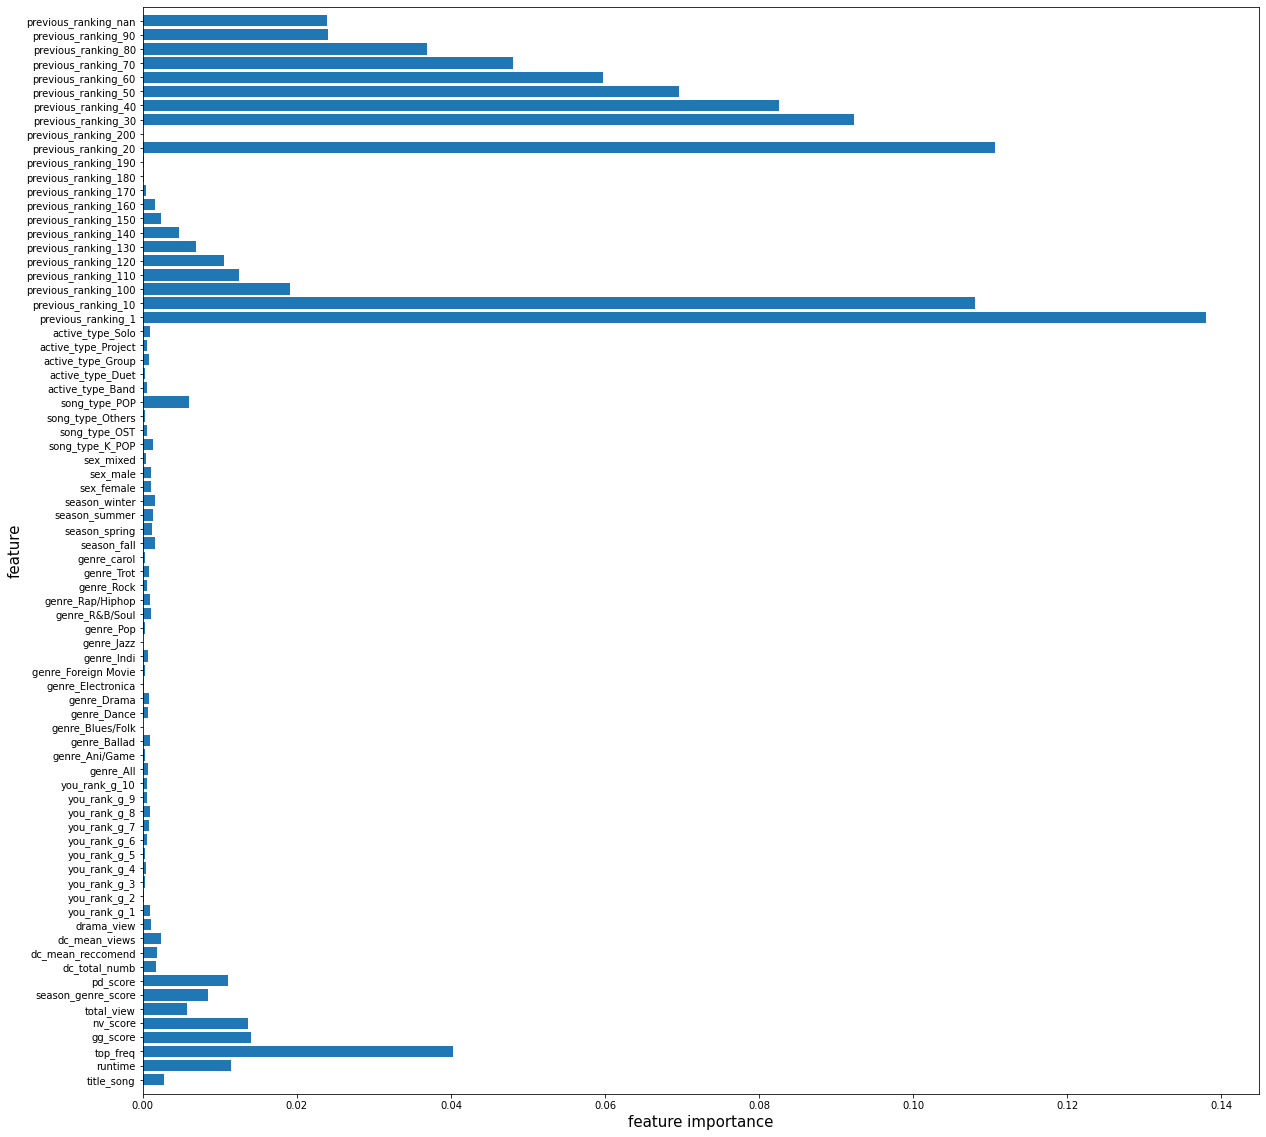

In [171]:
n_feature = len(X_train.columns)
index = np.arange(n_feature)

plt.figure(figsize= (20,20),facecolor = 'white')
plt.barh(index, f_model.feature_importances_, align='center')

plt.yticks(index, X_train.columns)

plt.ylim(-1, n_feature)

plt.xlabel('feature importance', size=15)

plt.ylabel('feature', size=15)

plt.show()

# Catboost

In [15]:
!pip install catboost
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor

In [16]:
cat = [0,1,2,3,4,5,18]

In [41]:
X_train.head()

,title_song,runtime,top_freq,gg_score,nv_score,total_view,season_genre_score,pd_score,dc_total_numb,dc_mean_reccomend,dc_mean_views,drama_view,you_rank_g_1,you_rank_g_2,you_rank_g_3,you_rank_g_4,you_rank_g_5,you_rank_g_6,you_rank_g_7,you_rank_g_8,you_rank_g_9,you_rank_g_10,genre_All,genre_Ani/Game,genre_Ballad,genre_Blues/Folk,genre_Dance,genre_Drama,genre_Electronica,genre_Foreign Movie,genre_Indi,genre_Jazz,genre_Pop,genre_R&B/Soul,genre_Rap/Hiphop,genre_Rock,genre_Trot,genre_carol,season_fall,season_spring,season_summer,season_winter,sex_female,sex_male,sex_mixed,song_type_K_POP,song_type_OST,song_type_Others,song_type_POP,active_type_Band,active_type_Duet,active_type_Group,active_type_Project,active_type_Solo,previous_ranking_1,previous_ranking_10,previous_ranking_100,previous_ranking_110,previous_ranking_120,previous_ranking_130,previous_ranking_140,previous_ranking_150,previous_ranking_160,previous_ranking_170,previous_ranking_180,previous_ranking_190,previous_ranking_20,previous_ranking_200,previous_ranking_30,previous_ranking_40,previous_ranking_50,previous_ranking_60,previous_ranking_70,previous_ranking_80,previous_ranking_90,previous_ranking_nan
16498,1,0.517751,0.057692,0.15,0.072906,0.000000,0.613522,0.000000,0.000000,0.000000,0.000000,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3971,1,0.571006,0.346154,0.23,0.547273,0.000000,0.696854,0.294895,0.000000,0.000000,0.000000,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4030,1,0.565089,0.163462,0.42,0.595276,0.882472,0.696854,0.238046,0.264635,0.046746,0.011505,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11929,0,0.733728,1.000000,0.31,0.741259,0.000000,0.503168,0.563948,0.349086,0.073475,0.018291,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10229,1,0.677515,0.067308,0.61,0.884981,0.000000,0.514430,0.000000,0.000000,0.000000,0.000000,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [194]:
score = cross_val_score(model, X_train, y_train, cv = stf, scoring = 'neg_mean_squared_error')
score.mean()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1:	learn: 2.2956361	total: 165ms	remaining: 6m 52s
2:	learn: 2.2925456	total: 246ms	remaining: 6m 49s
3:	learn: 2.2879050	total: 331ms	remaining: 6m 53s
4:	learn: 2.2833803	total: 408ms	remaining: 6m 48s
5:	learn: 2.2788076	total: 486ms	remaining: 6m 44s
6:	learn: 2.2742829	total: 565ms	remaining: 6m 42s
7:	learn: 2.2697383	total: 645ms	remaining: 6m 42s
8:	learn: 2.2652634	total: 732ms	remaining: 6m 46s
9:	learn: 2.2606293	total: 810ms	remaining: 6m 44s
10:	learn: 2.2562331	total: 889ms	remaining: 6m 43s
11:	learn: 2.2518579	total: 973ms	remaining: 6m 44s
12:	learn: 2.2473316	total: 1.05s	remaining: 6m 44s
13:	learn: 2.2428448	total: 1.13s	remaining: 6m 43s
14:	learn: 2.2384813	total: 1.22s	remaining: 6m 44s
15:	learn: 2.2341254	total: 1.3s	remaining: 6m 44s
16:	learn: 2.2298849	total: 1.38s	remaining: 6m 43s
17:	learn: 2.2260498	total: 1.46s	remaining: 6m 43s
18:	learn: 2.2216614	total: 1.54s	remaining: 6m 43s
19:	learn: 2.2175099	total: 1.62s	rema

0.7283975701680486

In [17]:
regression = CatBoostRegressor(n_estimators= 5000, learning_rate = 0.001, border_count = 7, depth = 10, random_state= 1,cat_features = cat)

In [18]:
regression.fit(X_train,y_train)

0:	learn: 56.9052524	total: 57.8ms	remaining: 2m 53s
1:	learn: 56.8619148	total: 111ms	remaining: 2m 45s
2:	learn: 56.8170200	total: 162ms	remaining: 2m 41s
3:	learn: 56.7740087	total: 171ms	remaining: 2m 7s
4:	learn: 56.7290542	total: 196ms	remaining: 1m 57s
5:	learn: 56.6834803	total: 214ms	remaining: 1m 46s
6:	learn: 56.6379810	total: 269ms	remaining: 1m 55s
7:	learn: 56.5926841	total: 296ms	remaining: 1m 50s
8:	learn: 56.5490768	total: 306ms	remaining: 1m 41s
9:	learn: 56.5037751	total: 318ms	remaining: 1m 35s
10:	learn: 56.4580716	total: 337ms	remaining: 1m 31s
11:	learn: 56.4116934	total: 384ms	remaining: 1m 35s
12:	learn: 56.3670004	total: 419ms	remaining: 1m 36s
13:	learn: 56.3245074	total: 438ms	remaining: 1m 33s
14:	learn: 56.2787854	total: 489ms	remaining: 1m 37s
15:	learn: 56.2327210	total: 537ms	remaining: 1m 40s
16:	learn: 56.1893056	total: 549ms	remaining: 1m 36s
17:	learn: 56.1444047	total: 596ms	remaining: 1m 38s
18:	learn: 56.1007094	total: 641ms	remaining: 1m 40s
19:

In [19]:
pred_y = regression.predict(X_test)

In [20]:
import math
import joblib

In [23]:
# 최종 결과
print("RMSE : %.3f" % math.sqrt(mean_squared_error(y_test, pred_y)))

MSE : 20.827


In [60]:
df.columns

Index(['artist', 'name', 'rank_g', 'you_rank_g', 'genre', 'season', 'sex',
       'song_type', 'active_type', 'title_song', 'week', 'runtime', 'top_freq',
       'gg_score', 'nv_score', 'total_view', 'season_genre_score', 'pd_score',
       'dc_total_numb', 'dc_mean_reccomend', 'dc_mean_views', 'drama_view',
       'st_day', 'rank', 'previous_ranking'],
      dtype='object')

In [ ]:
df['rank_g_pred'] = model.predict(df.drop(columns = ['rank_g','artist','name','week']))

In [ ]:
df['rank_g_pred'] = regression.predict(df.drop(columns = ['rank_g','artist','name','week','st_day','rank']))

In [186]:
from catboost import Pool

In [187]:
feature_score = pd.DataFrame(list(zip(X_train.dtypes.index, regression.get_feature_importance(Pool(X_train, label=y_train, cat_features=cat)))),
                columns=['Feature','Score'])

In [188]:
feature_score

,Feature,Score
0,you_rank_g,4.393208
1,genre,0.505924
2,season,1.559889
3,sex,0.704738
4,song_type,1.594333
5,active_type,0.613925
6,title_song,1.661803
7,runtime,0.279331
8,top_freq,10.229569
9,gg_score,1.386107


In [218]:
import seaborn as sns

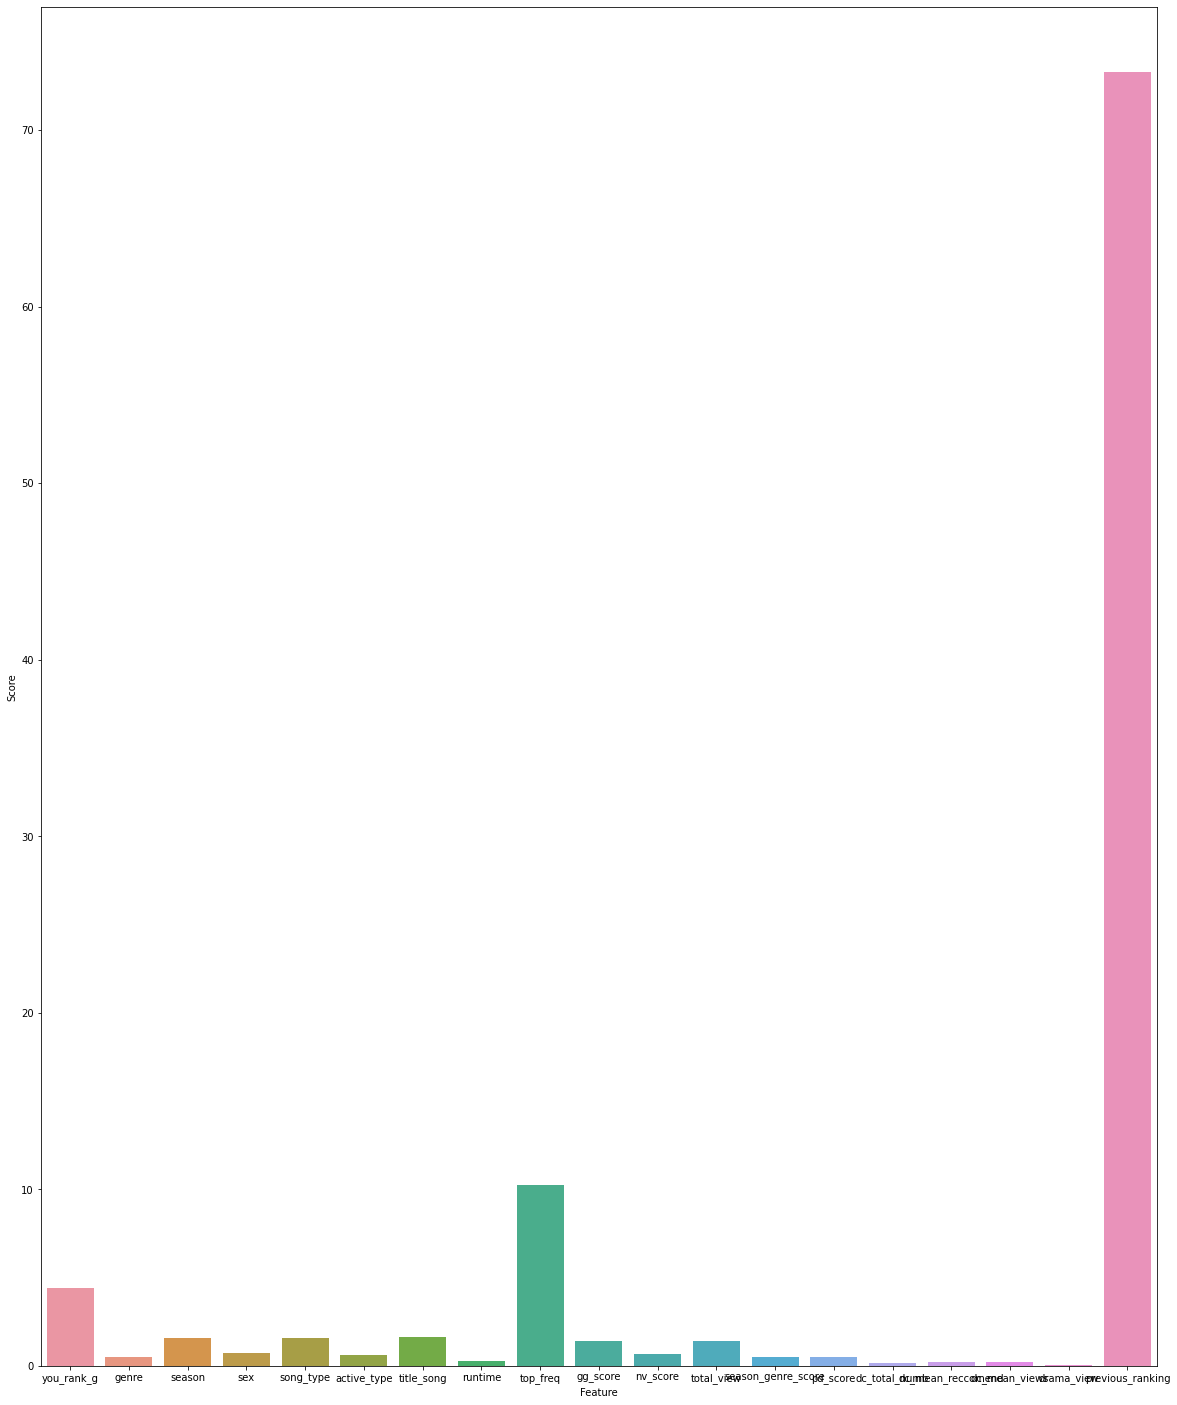

In [224]:
plt.figure(figsize = (20,25), facecolor = 'white')
sns.barplot(data = feature_score, x= 'Feature', y = 'Score')

In [216]:
a = df.drop(columns = ['artist','week','rank_g','name'])

In [217]:
a = a.drop(columns = ['rank'])

,you_rank_g,genre,season,sex,song_type,active_type,title_song,runtime,top_freq,gg_score,nv_score,total_view,season_genre_score,pd_score,dc_total_numb,dc_mean_reccomend,dc_mean_views,drama_view,st_day,rank,previous_ranking
0,8,Indi,spring,male,K_POP,Solo,1,0.508876,0.240385,0.32,0.485515,0.793178,0.513550,0.774053,0.0,0.0,0.0,0.0,2018.5.13,98,90
1,2,Dance,spring,female,K_POP,Group,1,0.553254,0.317308,0.07,0.511548,0.847350,0.551930,0.680336,0.0,0.0,0.0,0.0,2018.5.13,80,70
2,6,Pop,spring,female,POP,Solo,1,0.565089,0.855769,0.33,0.871046,0.812555,0.529333,0.000000,0.0,0.0,0.0,0.0,2018.5.13,26,20
3,10,Pop,spring,female,POP,Solo,1,0.408284,0.038462,0.41,0.857812,0.000000,0.529333,0.819462,0.0,0.0,0.0,0.0,2018.5.13,86,70
4,9,R&B/Soul,spring,male,K_POP,Solo,1,0.680473,0.250000,0.48,0.804124,0.787867,0.566807,0.000000,0.0,0.0,0.0,0.0,2018.5.13,53,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17058,10,Rap/Hiphop,spring,male,K_POP,Solo,0,0.576923,0.192308,0.38,0.540225,0.000000,0.477572,0.480855,0.0,0.0,0.0,0.0,2020.4.19,80,70
17059,10,R&B/Soul,spring,male,K_POP,Solo,0,0.606509,0.000000,0.27,0.487808,0.000000,0.566807,0.677504,0.0,0.0,0.0,0.0,2020.4.19,161,nan
17060,10,R&B/Soul,spring,male,K_POP,Solo,0,0.517751,0.000000,0.27,0.487808,0.000000,0.566807,0.677504,0.0,0.0,0.0,0.0,2020.4.19,167,nan
17061,10,R&B/Soul,spring,male,K_POP,Solo,0,0.627219,0.980769,0.27,0.487808,0.000000,0.566807,0.677504,0.0,0.0,0.0,0.0,2020.4.19,128,130


In [113]:
# 최종 결과 저장
df.to_csv('최종 결과_그래프_final_4.csv', encoding = 'utf-8',)

In [ ]:
a.to_csv('최종결과_model_final.csv')

In [103]:
joblib.dump(regression,'catboost.pkl')

['catboost.pkl']

In [14]:
regression = joblib.load('cpu_version_final_regression_3.pkl')

In [66]:
pred_y = regression.predict(test.drop(columns = ['rank']))

In [69]:
print("RMSE : %.3f" % math.sqrt(mean_squared_error(pred_y, test['rank'])))

RMSE : 22.286


# Xgboost

In [38]:
from xgboost import XGBRegressor

In [87]:
# XGB는 생각보다 성능이 낮다... 아마 파라미터 조정을 해야될듯...
xg_model = XGBRegressor(n_estimators = 2000,learning_rate = 0.05, tree_method='gpu_hist', random_state = 1)

In [177]:
score = cross_val_score(xg_model, X_train, y_train, cv = stf, scoring = 'f1_micro')

In [178]:
score.mean()

0.7258728151465437

In [88]:
xg_model.fit(X_train, y_train)

[10:57:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=2000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, tree_method='gpu_hist', verbosity=1)

In [89]:
pred_y = xg_model.predict(X_test)
print("RMSE : %.3f" % math.sqrt(mean_squared_error(y_test, pred_y)))

F1 : 18.640


In [90]:
pred_y = xg_model.predict(test.drop(columns = ['rank']))

In [91]:
print("RMSE : %.3f" % math.sqrt(mean_squared_error(pred_y, test['rank'])))

RMSE : 21.168


In [92]:
df['rank_g_pred'] = xg_model.predict(df.drop(columns = ['rank_g','artist','name','week','st_day','rank']))

In [93]:
# 최종 결과 저장
df.to_csv('최종 결과_그래프_final_5.csv', encoding = 'utf-8')

In [96]:
joblib.dump(xg_model,'XG_boost.pkl')

['XG_boost.pkl']

In [204]:
from xgboost import plot_importance

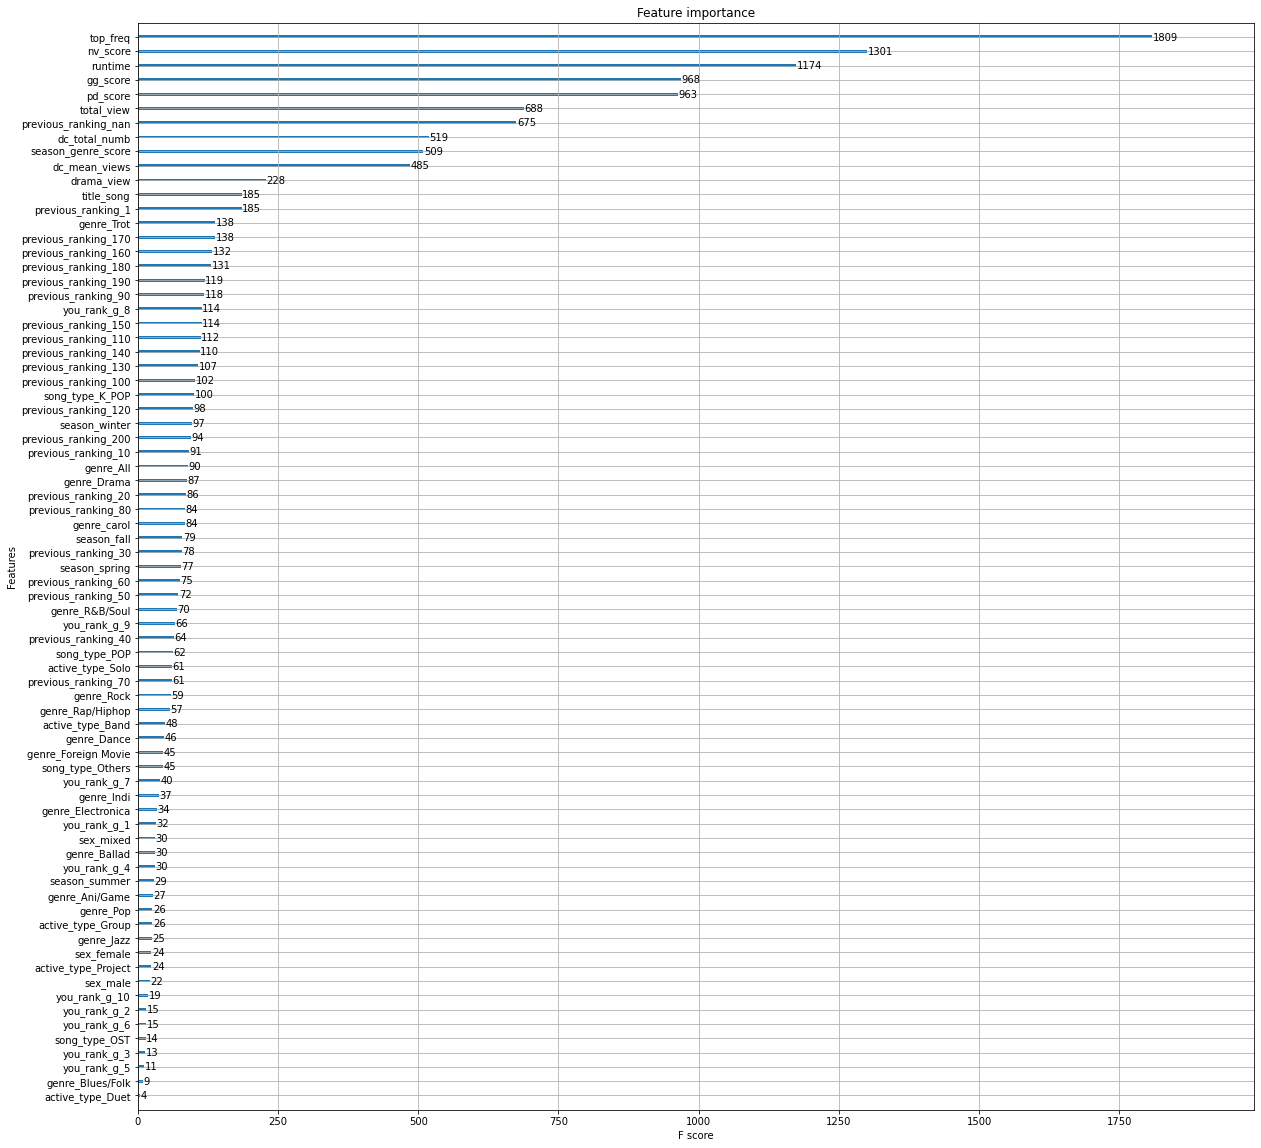

In [210]:
fig, ax = plt.subplots(figsize=(20, 20), facecolor = 'white')
plot_importance(xg_model,ax=ax)